# Notebook 1.

In [5]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,MALE
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,FEMALE
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,FEMALE


In [6]:
penguins = penguins[['flipper_length_mm', 'body_mass_g']]
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   body_mass_g        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


In [7]:
penguins.dropna(inplace=True)
penguins = penguins.reset_index(drop=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   flipper_length_mm  342 non-null    float64
 1   body_mass_g        342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB


Text(0.5, 1.0, 'Body Mass as a function of the Flipper Length')

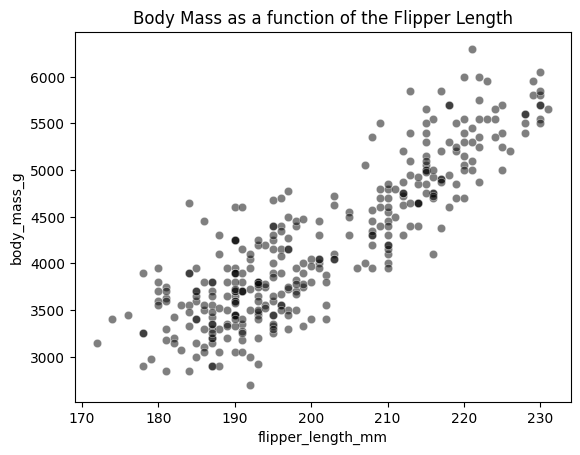

In [8]:
import seaborn as sns

feature_name = "flipper_length_mm"
target_name = "body_mass_g"
data, target = penguins[[feature_name]], penguins[target_name]

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.set_title("Body Mass as a function of the Flipper Length")

In [9]:
def linear_model_flipper_mass(
    flipper_length, weight_flipper_length, intercept_body_mass
):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

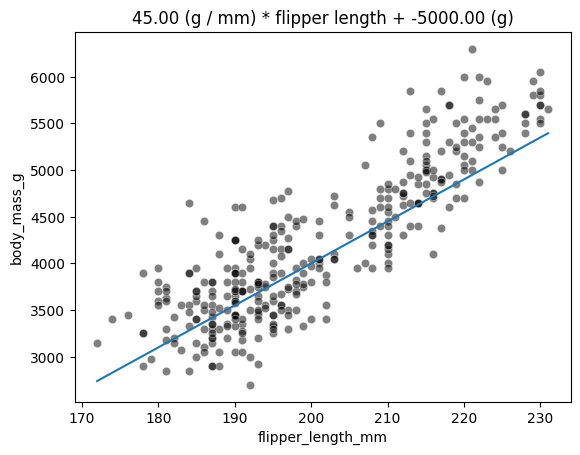

In [10]:
import numpy as np

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

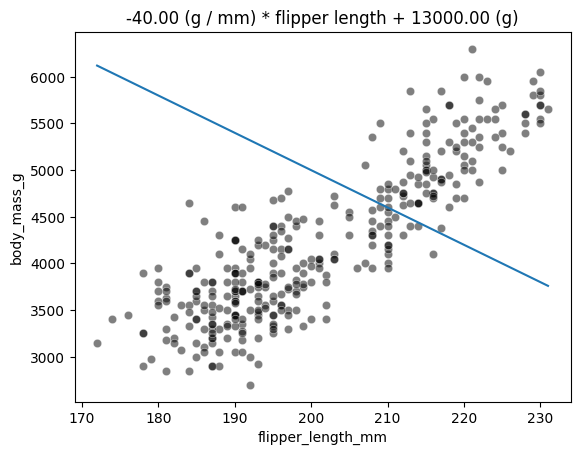

In [11]:
weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass
)

ax = sns.scatterplot(
    data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5
)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

# Notebook 2.

In [2]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

penguins = penguins[['flipper_length_mm', 'body_mass_g']]
penguins.dropna(inplace=True)
penguins = penguins.reset_index(drop=True)
feature_name = "flipper_length_mm"
target_name = "body_mass_g"

data, target = penguins[[feature_name]], penguins[target_name]
penguins.head()

,flipper_length_mm,body_mass_g
0,181.00,3750.00
1,186.00,3800.00
2,195.00,3250.00
3,193.00,3450.00
4,190.00,3650.00


In [3]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(data, target)

LinearRegression()

In [4]:
weight_flipper_length = linear_regression.coef_[0]
weight_flipper_length

49.68556640610011

In [5]:
intercept_body_mass = linear_regression.intercept_
intercept_body_mass

-5780.831358077066

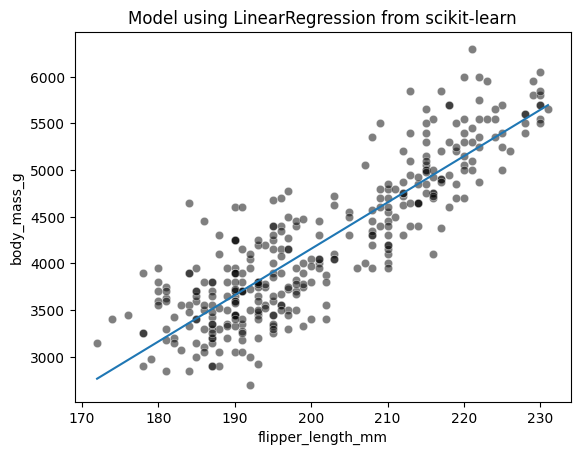

In [6]:
import numpy as np

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = (
    weight_flipper_length * flipper_length_range + intercept_body_mass
)

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=data[feature_name], y=target, color="black", alpha=0.5)
plt.plot(flipper_length_range, predicted_body_mass)
_ = plt.title("Model using LinearRegression from scikit-learn")

In [7]:
from sklearn.metrics import mean_squared_error

inferred_body_mass = linear_regression.predict(data)
model_error = mean_squared_error(target, inferred_body_mass)
print(f"The mean squared error of the optimal model is {model_error:.2f}")

The mean squared error of the optimal model is 154546.19


A linear regression model minimizes the mean squared error on the training
set. This means that the parameters obtained after the fit (i.e. `coef_` and
`intercept_`) are the optimal parameters that minimizes the mean squared
error. In other words, any other choice of parameters would yield a model with
a higher mean squared error on the training set.

However, the mean squared error is difficult to interpret. The mean absolute
error is more intuitive since it provides an error in the same unit as the one
of the target.

In [8]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(target, inferred_body_mass)
print(f"The mean absolute error of the optimal model is {model_error:.2f} g")

The mean absolute error of the optimal model is 313.00 g


# Notebook 3.

In [29]:
import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# only keep the Adelie and Chinstrap classes
penguins = (
    penguins.set_index("species").loc[["Adelie", "Chinstrap"]].reset_index()
)
penguins = penguins[['species', 'flipper_length_mm', 'body_mass_g']].reset_index(drop=True)
penguins.dropna(inplace=True)
penguins.head()

,species,flipper_length_mm,body_mass_g
0,Adelie,181.00,3750.00
1,Adelie,186.00,3800.00
2,Adelie,195.00,3250.00
4,Adelie,193.00,3450.00
5,Adelie,190.00,3650.00


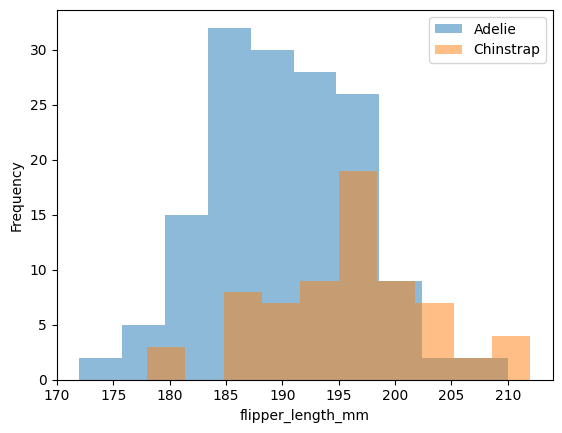

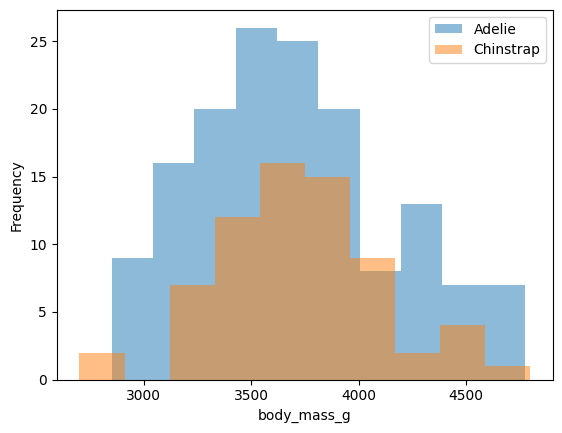

In [30]:
culmen_columns = ['flipper_length_mm', 'body_mass_g']
target_column = "species"


import matplotlib.pyplot as plt

for feature_name in culmen_columns:
    plt.figure()
    # plot the histogram for each specie
    penguins.groupby("species")[feature_name].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feature_name)

In [31]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
logistic_regression.fit(data_train, target_train)
accuracy = logistic_regression.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy:.3f}")

Accuracy on test set: 0.618


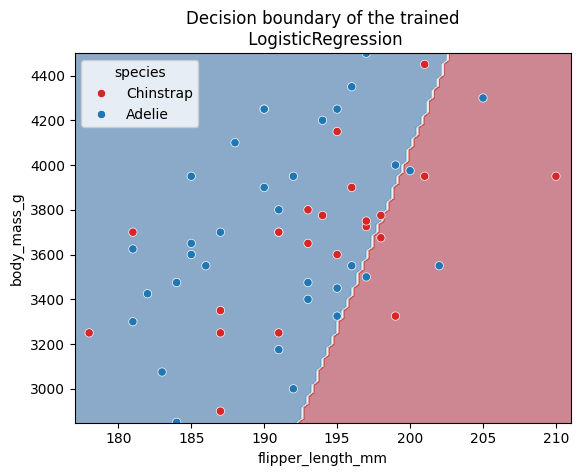

In [33]:
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Decision boundary of the trained\n LogisticRegression")

In [34]:
coefs = logistic_regression[-1].coef_[0]
weights = pd.Series(coefs, index=[f"Weight for '{c}'" for c in culmen_columns])
weights

Weight for 'flipper_length_mm'    1.42
Weight for 'body_mass_g'         -0.54
dtype: float64

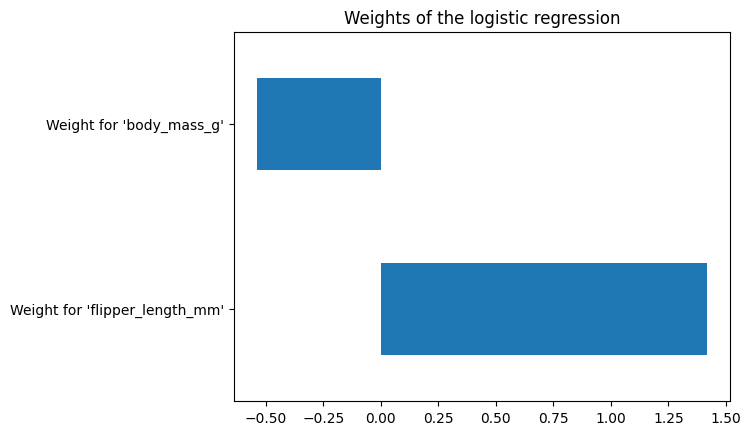

In [35]:
weights.plot.barh()
_ = plt.title("Weights of the logistic regression")

In [36]:
test_penguin = pd.DataFrame(
    {'flipper_length_mm': [45], 'body_mass_g': [17]}
)
logistic_regression.predict(test_penguin)

array(['Adelie'], dtype=object)

In [37]:
y_pred_proba = logistic_regression.predict_proba(test_penguin)
y_pred_proba

array([[1.00000000e+00, 1.75589318e-11]])

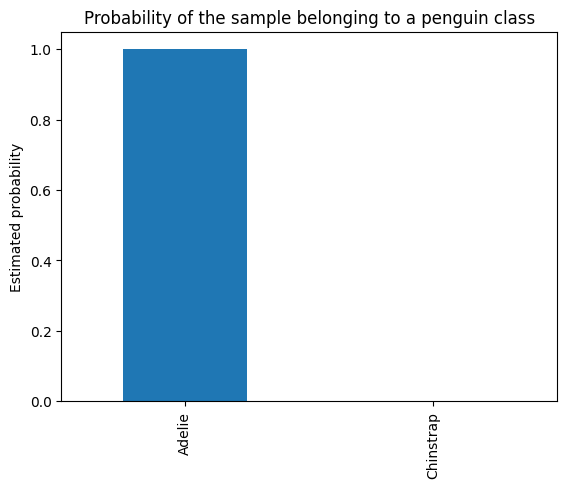

In [38]:
y_proba_sample = pd.Series(
    y_pred_proba.ravel(), index=logistic_regression.classes_
)
y_proba_sample.plot.bar()
plt.ylabel("Estimated probability")
_ = plt.title("Probability of the sample belonging to a penguin class")

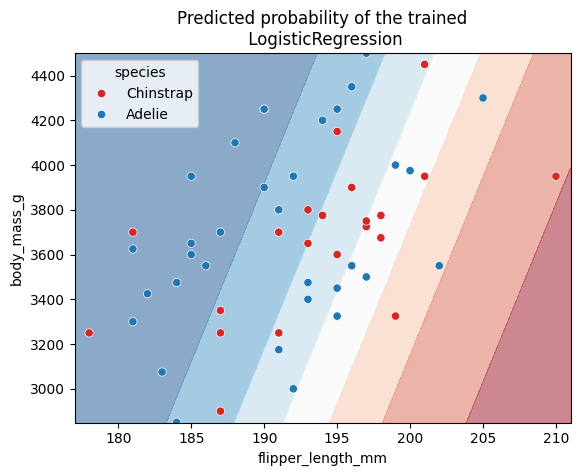

In [39]:
DecisionBoundaryDisplay.from_estimator(
    logistic_regression,
    data_test,
    response_method="predict_proba",
    cmap="RdBu_r",
    alpha=0.5,
)
sns.scatterplot(
    data=penguins_test,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Predicted probability of the trained\n LogisticRegression")

# Notebook 4.

In this notebook, we show that even if linear models are not natively adapted
to express a `target` that is not a linear function of the `data`, it is still
possible to make linear models more expressive by engineering additional
features.

A machine learning pipeline that combines a non-linear feature engineering
step followed by a linear regression step can therefore be considered a
non-linear regression model as a whole.

In [1]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = data_max - data_min
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * 0.3
target = data**3 - 0.5 * data**2 + noise

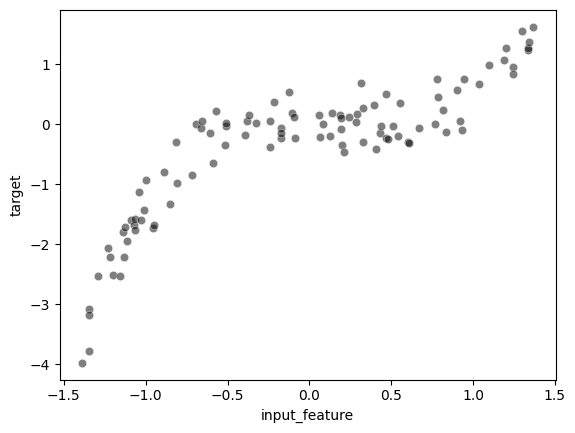

In [2]:
import pandas as pd

full_data = pd.DataFrame({"input_feature": data, "target": target})
import seaborn as sns

_ = sns.scatterplot(
    data=full_data, x="input_feature", y="target", color="black", alpha=0.5
)

In [3]:
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [4]:
def fit_score_plot_regression(model, title=None):
    model.fit(data, target)
    target_predicted = model.predict(data)
    mse = mean_squared_error(target, target_predicted)
    ax = sns.scatterplot(
        data=full_data, x="input_feature", y="target", color="black", alpha=0.5
    )
    ax.plot(data, target_predicted)
    if title is not None:
        _ = ax.set_title(title + f" (MSE = {mse:.2f})")
    else:
        _ = ax.set_title(f"Mean squared error = {mse:.2f}")

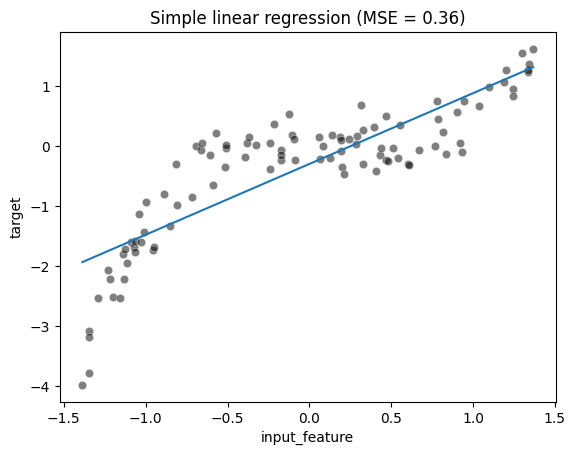

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression()

fit_score_plot_regression(linear_regression, title="Simple linear regression")

In [6]:
print(
    f"weight: {linear_regression.coef_[0]:.2f}, "
    f"intercept: {linear_regression.intercept_:.2f}"
)

weight: 1.18, intercept: -0.29


Notice that the learnt model cannot handle the non-linear relationship between
`data` and `target` because linear models assume a linear relationship.
Indeed, there are 3 possibilities to solve this issue:

1. choose a model that can natively deal with non-linearity,
2. engineer a richer set of features by including expert knowledge which can
   be directly used by a simple linear model, or
3. use a "kernel" to have a locally-based decision function instead of a
   global linear decision function.

Let's illustrate quickly the first point by using a decision tree regressor
which can natively handle non-linearity.

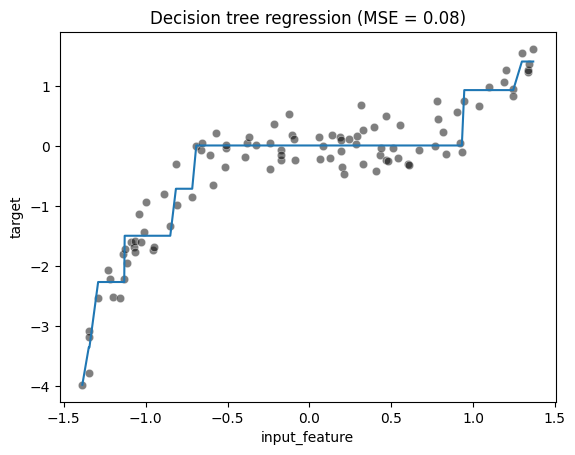

In [7]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)

fit_score_plot_regression(tree, title="Decision tree regression")

Instead of having a model which can natively deal with non-linearity, we could
also modify our data: we could create new features, derived from the original
features, using some expert knowledge. In this example, we know that we have a
cubic and squared relationship between `data` and `target` (because we
generated the data).

Indeed, we could create two new features (`data ** 2` and `data ** 3`) using
this information as follows. This kind of transformation is called a
polynomial feature expansion:

In [8]:
data.shape

(100, 1)

In [9]:
data_expanded = np.concatenate([data, data**2, data**3], axis=1)
data_expanded.shape

(100, 3)

Instead of manually creating such polynomial features one could directly use
[sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

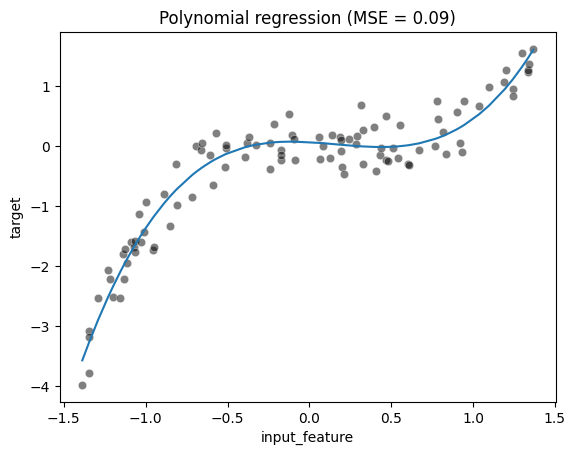

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False),
    LinearRegression(),
)

fit_score_plot_regression(polynomial_regression, title="Polynomial regression")

We can see that even with a linear model, we can overcome the linearity
limitation of the model by adding the non-linear components in the design of
additional features. Here, we created new features by knowing the way the
target was generated.

The last possibility is to make a linear model more expressive is to use a
"kernel". Instead of learning one weight per feature as we previously did, a
weight is assigned to each sample. However, not all samples are used: some
redundant data points of the training set are assigned a weight of 0 so
that they do no influence the model's prediction function. This is the
main intuition of the support vector machine algorithm.

The mathematical definition of "kernels" and "support vector machines" is
beyond the scope of this course. We encourage interested readers with a
mathematical training to have a look at the scikit-learn [documentation on
SVMs](https://scikit-learn.org/stable/modules/svm.html) for more details.

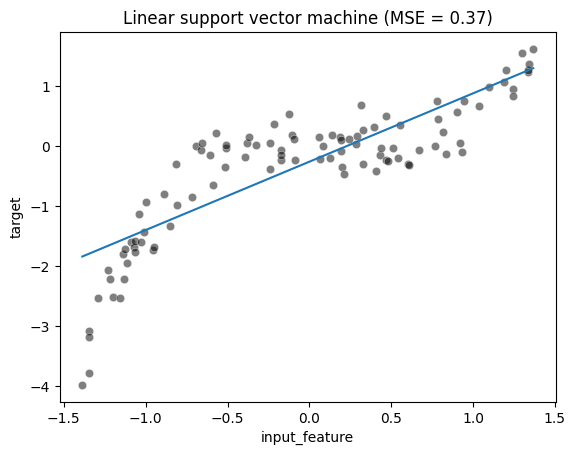

In [13]:
from sklearn.svm import SVR

svr = SVR(kernel="linear")

fit_score_plot_regression(svr, title="Linear support vector machine")

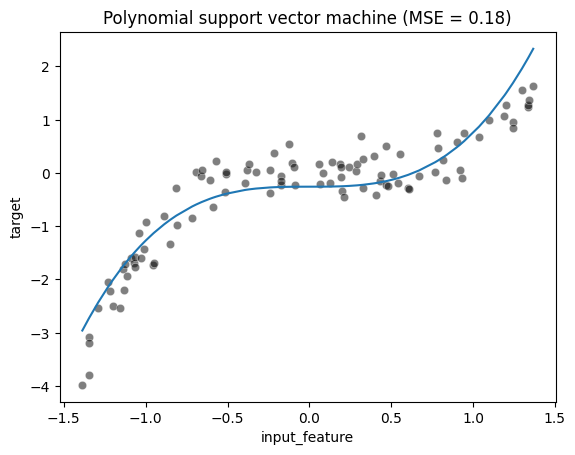

In [14]:
svr = SVR(kernel="poly", degree=3)
fit_score_plot_regression(svr, title="Polynomial support vector machine")

The predictions of our SVR with a linear kernel are all aligned on a straight
line. `SVR(kernel="linear")` is indeed yet another example of a linear model.

The estimator can also be configured to use a non-linear kernel. Then, it can
learn a prediction function that computes non-linear relations between samples
for which we want to make a prediction and selected samples from the training
set.

The result is another kind of non-linear regression model with a similar
expressivity as our previous polynomial regression pipeline:

Kernel methods such as SVR are very efficient for small to medium datasets.

For larger datasets with `n_samples >> 10_000`, it is often computationally
more efficient to perform explicit feature expansion using
`PolynomialFeatures` or other non-linear transformers from scikit-learn such
as
[KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
or
[SplineTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.SplineTransformer.html).

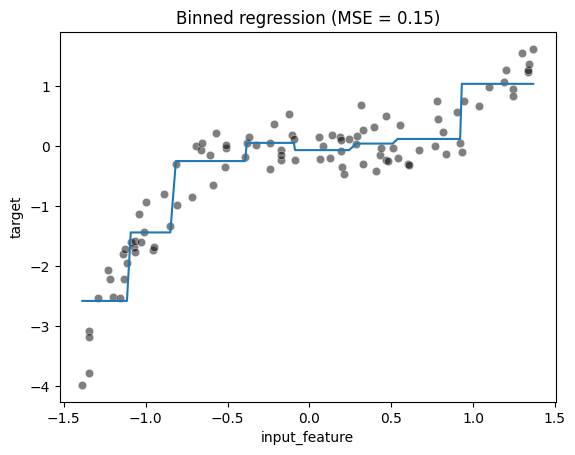

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins=8),
    LinearRegression(),
)

fit_score_plot_regression(binned_regression, title="Binned regression")

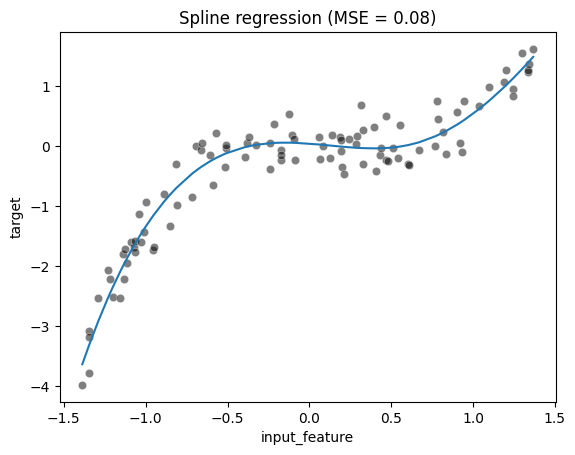

In [16]:
from sklearn.preprocessing import SplineTransformer

spline_regression = make_pipeline(
    SplineTransformer(degree=3, include_bias=False),
    LinearRegression(),
)

fit_score_plot_regression(spline_regression, title="Spline regression")

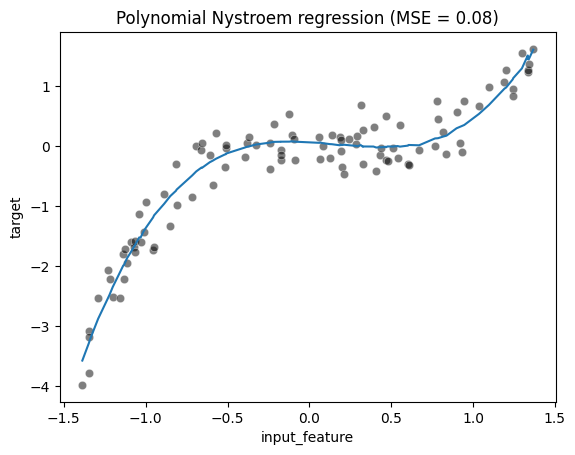

In [19]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(kernel="poly", degree=3, n_components=5, random_state=0),
    LinearRegression(),
)

fit_score_plot_regression(nystroem_regression, title="Polynomial Nystroem regression")

# Notebook 5.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

feature_names = ["Feature #0", "Feature #1"]
target_name = "class"

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name],
)
data_moons, target_moons = moons[feature_names], moons[target_name]

In [2]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(
    n_samples=100, n_features=2, n_classes=2, random_state=42
)
gauss = pd.DataFrame(
    np.concatenate([X, y[:, np.newaxis]], axis=1),
    columns=feature_names + [target_name],
)
data_gauss, target_gauss = gauss[feature_names], gauss[target_name]

In [3]:
xor = pd.DataFrame(
    np.random.RandomState(0).uniform(low=-1, high=1, size=(200, 2)),
    columns=feature_names,
)
target_xor = np.logical_xor(xor["Feature #0"] > 0, xor["Feature #1"] > 0)
target_xor = target_xor.astype(np.int32)
xor["class"] = target_xor
data_xor = xor[feature_names]

[Text(0.5, 1.0, 'The XOR dataset'), Text(0.5, 0, 'Feature #0')]

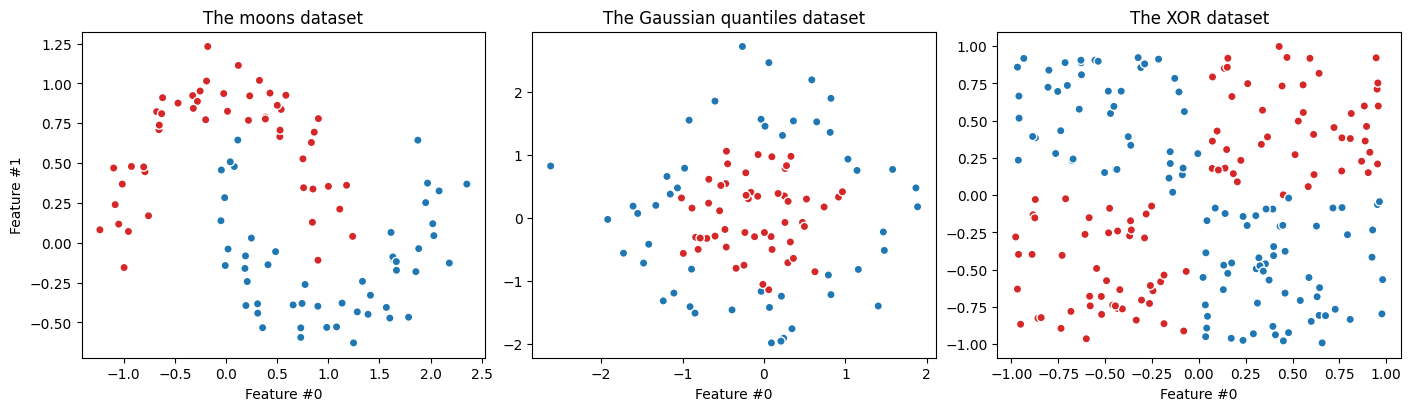

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


_, axs = plt.subplots(ncols=3, figsize=(14, 4), constrained_layout=True)

common_scatter_plot_params = dict(
    cmap=ListedColormap(["tab:red", "tab:blue"]),
    edgecolor="white",
    linewidth=1,
)

axs[0].scatter(
    data_moons[feature_names[0]],
    data_moons[feature_names[1]],
    c=target_moons,
    **common_scatter_plot_params,
)
axs[1].scatter(
    data_gauss[feature_names[0]],
    data_gauss[feature_names[1]],
    c=target_gauss,
    **common_scatter_plot_params,
)
axs[2].scatter(
    data_xor[feature_names[0]],
    data_xor[feature_names[1]],
    c=target_xor,
    **common_scatter_plot_params,
)
axs[0].set(
    title="The moons dataset",
    xlabel=feature_names[0],
    ylabel=feature_names[1],
)
axs[1].set(
    title="The Gaussian quantiles dataset",
    xlabel=feature_names[0],
)
axs[2].set(
    title="The XOR dataset",
    xlabel=feature_names[0],
)

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay


def plot_decision_boundary(model, title=None):
    datasets = [
        (data_moons, target_moons),
        (data_gauss, target_gauss),
        (data_xor, target_xor),
    ]
    fig, axs = plt.subplots(
        ncols=3,
        figsize=(14, 4),
        constrained_layout=True,
    )

    for i, ax, (data, target) in zip(
        range(len(datasets)),
        axs,
        datasets,
    ):
        model.fit(data, target)
        DecisionBoundaryDisplay.from_estimator(
            model,
            data,
            response_method="predict_proba",
            plot_method="pcolormesh",
            cmap="RdBu",
            alpha=0.8,
            # Setting vmin and vmax to the extreme values of the probability to
            # ensure that 0.5 is mapped to white (the middle) of the blue-red
            # colormap.
            vmin=0,
            vmax=1,
            ax=ax,
        )
        DecisionBoundaryDisplay.from_estimator(
            model,
            data,
            response_method="predict_proba",
            plot_method="contour",
            alpha=0.8,
            levels=[0.5],  # 0.5 probability contour line
            linestyles="--",
            linewidths=2,
            ax=ax,
        )
        ax.scatter(
            data[feature_names[0]],
            data[feature_names[1]],
            c=target,
            **common_scatter_plot_params,
        )
        if i > 0:
            ax.set_ylabel(None)
    if title is not None:
        fig.suptitle(title)

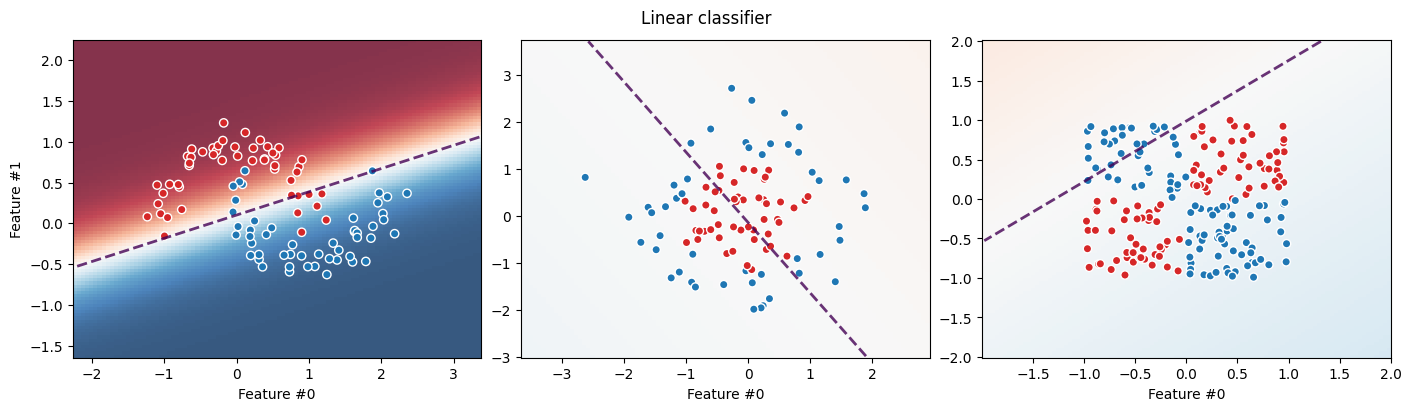

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())


plot_decision_boundary(logistic_regression, title="Linear classifier")

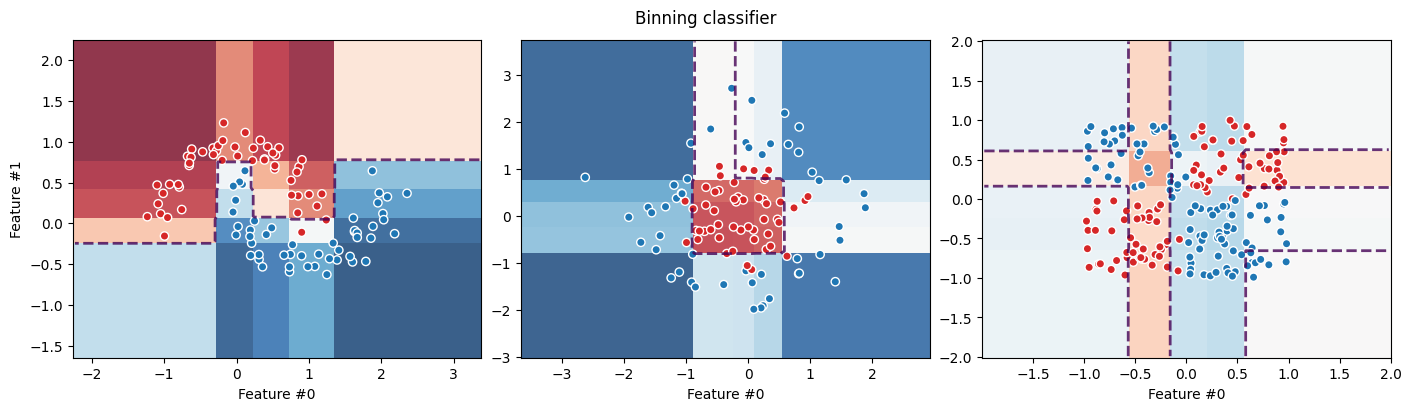

In [8]:
from sklearn.preprocessing import KBinsDiscretizer

classifier = make_pipeline(
    KBinsDiscretizer(n_bins=5, encode="onehot"),  # already the default params
    LogisticRegression(),
)

plot_decision_boundary(classifier, title="Binning classifier")

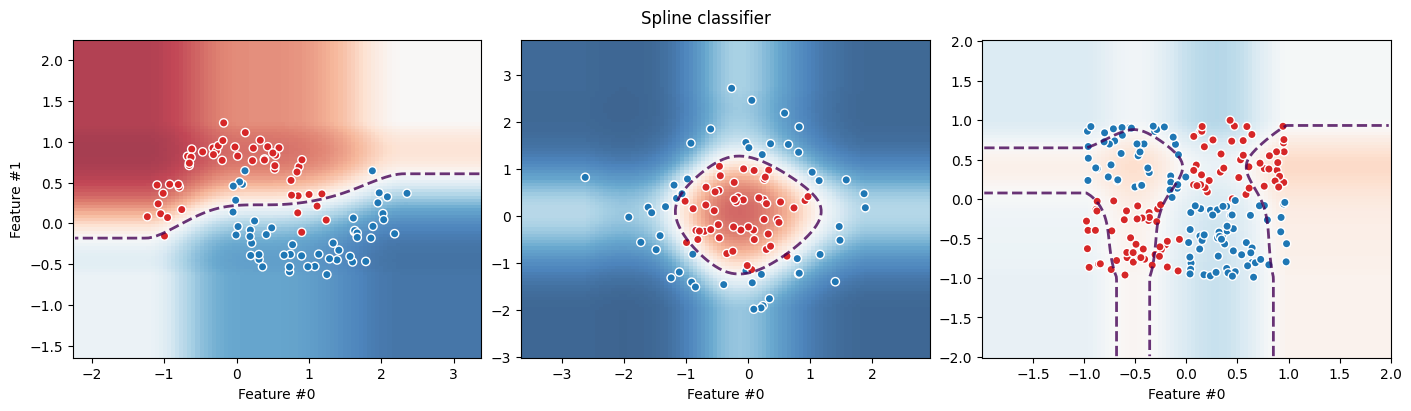

In [9]:
from sklearn.preprocessing import SplineTransformer

classifier = make_pipeline(
    SplineTransformer(degree=3, n_knots=5),
    LogisticRegression(),
)

plot_decision_boundary(classifier, title="Spline classifier")

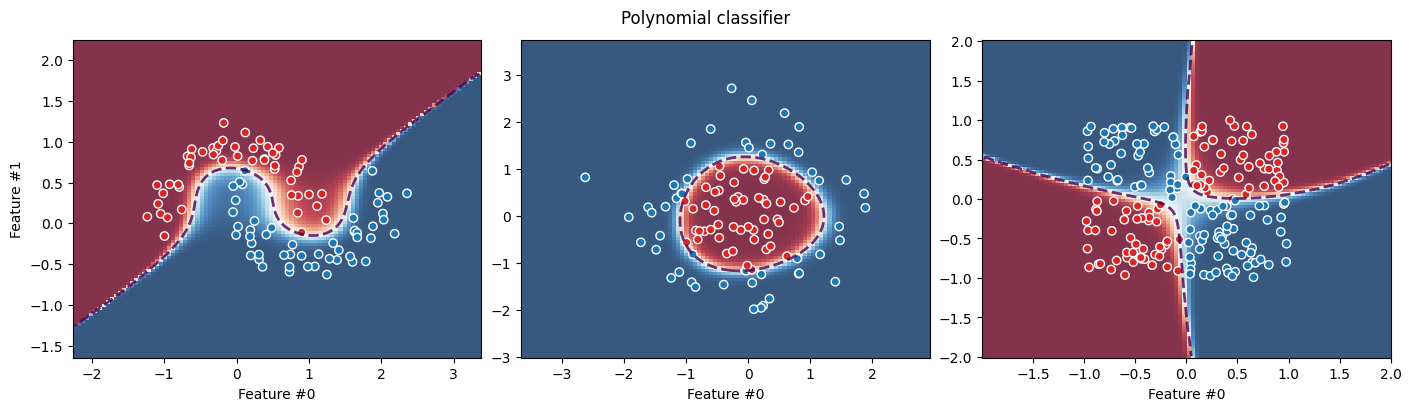

In [10]:
from sklearn.preprocessing import PolynomialFeatures

classifier = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3, include_bias=False),
    LogisticRegression(C=10),
)

plot_decision_boundary(classifier, title="Polynomial classifier")

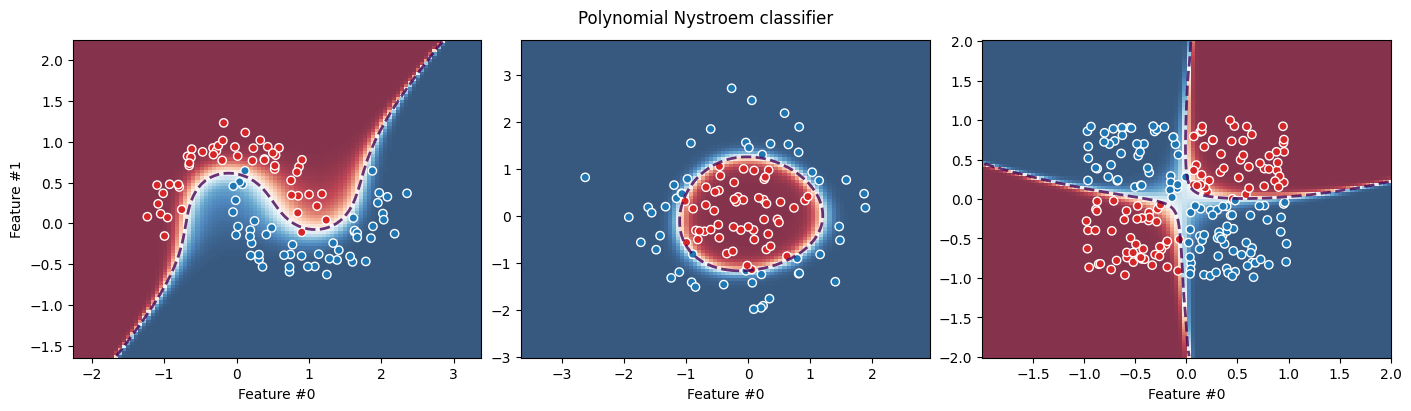

In [11]:
from sklearn.kernel_approximation import Nystroem

classifier = make_pipeline(
    StandardScaler(),
    Nystroem(kernel="poly", degree=3, coef0=1, n_components=100),
    LogisticRegression(C=10),
)

plot_decision_boundary(classifier, title="Polynomial Nystroem classifier")

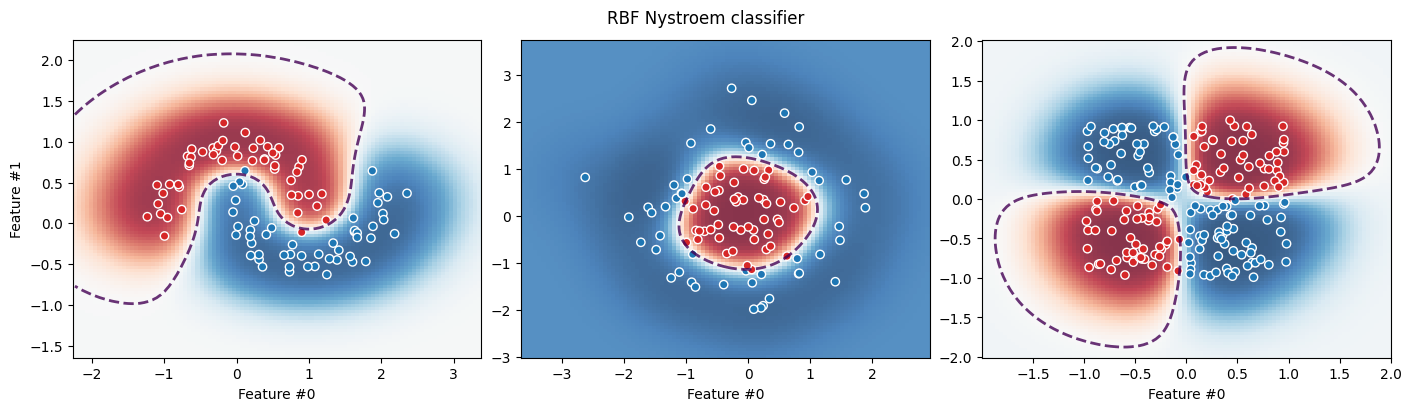

In [12]:
from sklearn.kernel_approximation import Nystroem

classifier = make_pipeline(
    StandardScaler(),
    Nystroem(kernel="rbf", gamma=1, n_components=100),
    LogisticRegression(C=5),
)

plot_decision_boundary(classifier, title="RBF Nystroem classifier")

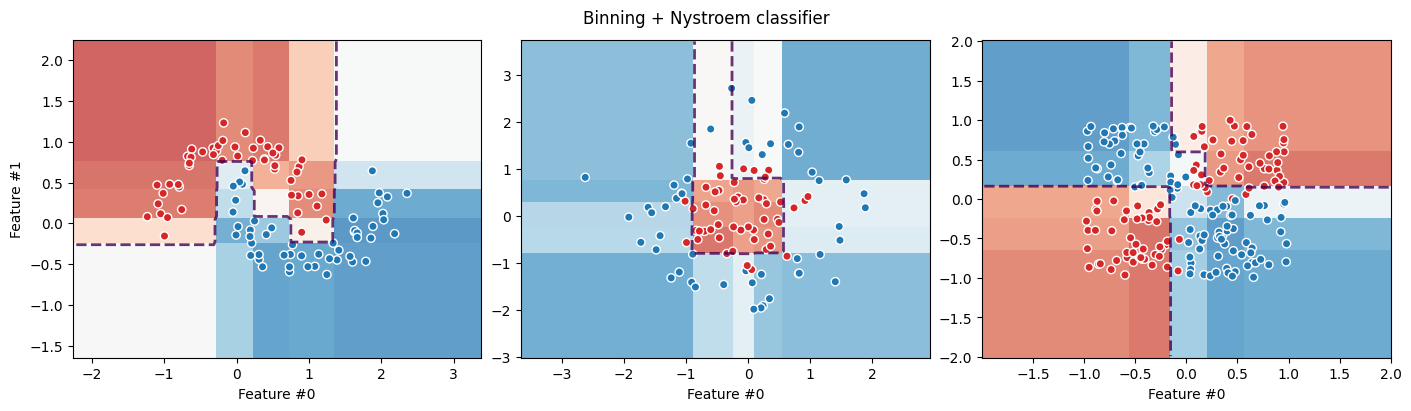

In [13]:
classifier = make_pipeline(
    KBinsDiscretizer(n_bins=5),
    Nystroem(kernel="rbf", gamma=1.0, n_components=100),
    LogisticRegression(),
)

plot_decision_boundary(classifier, title="Binning + Nystroem classifier")

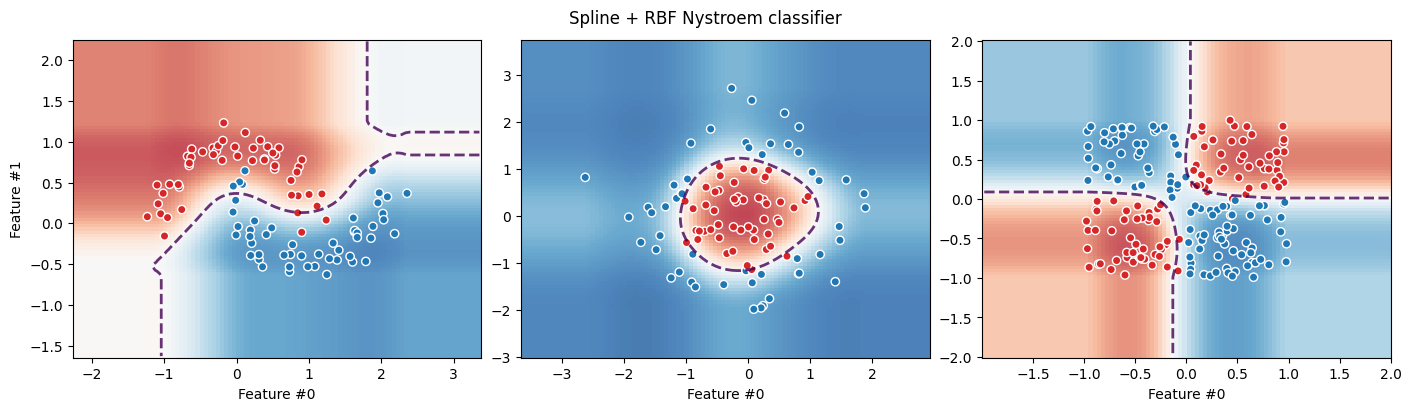

In [14]:
from sklearn.kernel_approximation import Nystroem

classifier = make_pipeline(
    SplineTransformer(n_knots=5),
    Nystroem(kernel="rbf", gamma=1.0, n_components=100),
    LogisticRegression(),
)

plot_decision_boundary(classifier, title="Spline + RBF Nystroem classifier")


## Summary and take-away messages

- Linear models such as logistic regression can be used for classification on
  non-linearly separable datasets by leveraging non-linear feature
  engineering.
- Transformers such as `KBinsDiscretizer` and `SplineTransformer` can be used
  to engineer non-linear features independently for each original feature.
- As a result, these transformers cannot capture interactions between the
  orignal features (and then would fail on the XOR classification task).
- Despite this limitation they already augment the expressivity of the
  pipeline, which can be sufficient for some datasets.
- They also favor axis-aligned decision boundaries, in particular in the low
  density regions of the feature space (axis-aligned extrapolation).
- Transformers such as `PolynomialFeatures` and `Nystroem` can be used to
  engineer non-linear features that capture interactions between the original
  features.
- It can be useful to combine several feature engineering transformers in a
  single pipeline to build a more expressive model, for instance to favor
  axis-aligned extrapolation while also capturing interactions.
- In particular, if the original dataset has both numerical and categorical
  features, it can be useful to apply binning or a spline transformation to the
  numerical features and one-hot encoding to the categorical features. Then,
  the resulting features can be combined with a kernel approximation to model
  interactions between numerical and categorical features. This can be
  achieved with the help of `ColumnTransformer`.

# Notebook 6.

In [1]:
path = r"C:\Users\HP\Downloads\ames_housing_no_missing.csv"

import pandas as pd
pd.set_option("display.float_format", "{:.2f}".format)
ames_housing = pd.read_csv(path)
ames_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.00,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.00,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.00,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.00,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.00,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [3]:
features_of_interest = [
    "LotFrontage",
    "LotArea",
    "PoolArea",
    "YearBuilt",
    "YrSold",
]
target_name = "SalePrice"
data, target = (
    ames_housing[features_of_interest],
    ames_housing[target_name],
)

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False), LinearRegression()
).set_output(transform="pandas")
cv_results = cross_validate(
    linear_regression,
    data,
    target,
    cv=10,
    scoring="neg_mean_squared_error",
    return_train_score=True,
    return_estimator=True,
)

In [5]:
train_error = -cv_results["train_score"]
print(
    "Mean squared error of linear regression model on the train set:\n"
    f"{train_error.mean():.2e} ± {train_error.std():.2e}"
)

Mean squared error of linear regression model on the train set:
2.85e+09 ± 8.63e+07


In [6]:
test_error = -cv_results["test_score"]
print(
    "Mean squared error of linear regression model on the test set:\n"
    f"{test_error.mean():.2e} ± {test_error.std():.2e}"
)

Mean squared error of linear regression model on the test set:
8.69e+10 ± 2.47e+11


The training error is in average one order of magnitude lower than the testing
error (lower error is better). Such a gap between the training and testing
scores is an indication that our model overfitted the training set. Indeed,
this is one of the dangers when augmenting the number of features with a
`PolynomialFeatures` transformer. For instance, one does not expect features
such as `PoolArea * YrSold` to be very predictive.

To analyze the weights of the model, we can create a dataframe. The columns of
the dataframe contain the feature names, while the rows store the coefficients
of each model of a given cross-validation fold.

In order to obtain the feature names associated with each feature combination,
we need to extract them from the augmented data created by
`PolynomialFeatures`. Fortunately, scikit-learn provides a convenient method
called `feature_names_in_` for this purpose. Let's begin by retrieving the
coefficients from the model fitted in the first cross-validation fold.

In [ ]:
model_first_fold = cv_results["estimator"][0]
